In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/clean_data.csv').drop(['status','location','builder'],axis=1).fillna(0)
print (data.shape)
data

(2620, 5)


,price,area,bhk,bathroom,age
0,37.49,872,2,0.0,1.0
1,93.54,1346,3,2.0,0.0
2,151.00,2225,3,0.0,0.0
3,49.00,1028,2,2.0,3.0
4,42.28,588,2,1.0,0.0
...,...,...,...,...,...
2615,27.50,750,2,2.0,3.0
2616,27.50,750,2,2.0,3.0
2617,30.00,800,2,2.0,3.0
2618,31.50,850,2,2.0,3.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   bhk       2620 non-null   int64  
 3   bathroom  2620 non-null   float64
 4   age       2620 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 102.5 KB


In [8]:
data.columns

Index(['price', 'area', 'bhk', 'bathroom', 'age'], dtype='object')

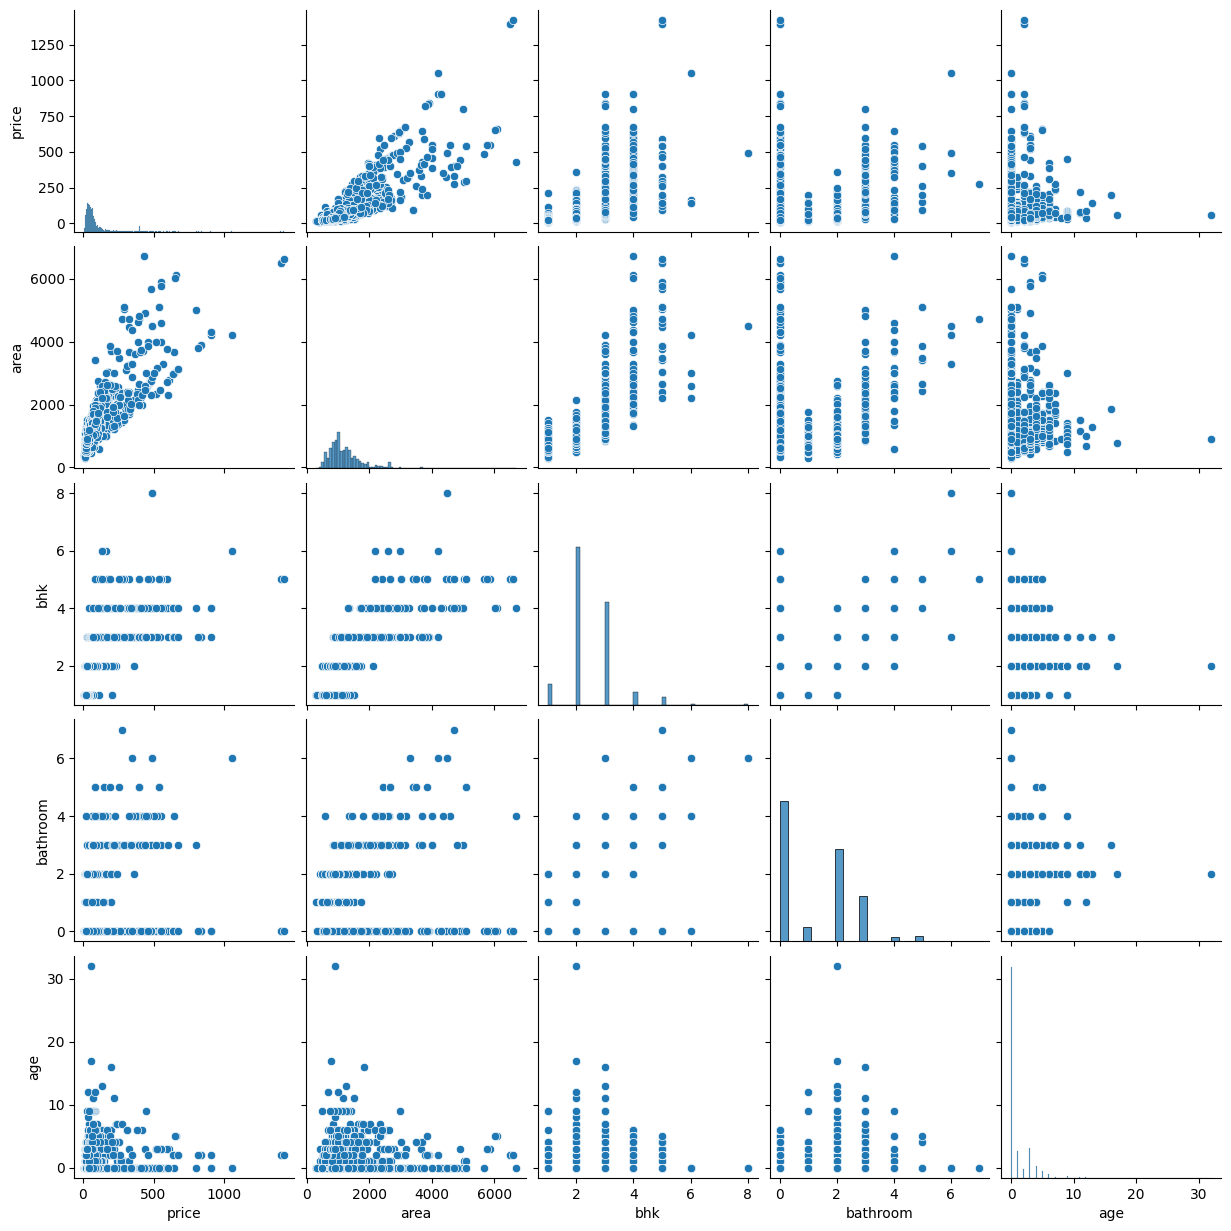

In [9]:
sns.pairplot(data)

<Axes: >

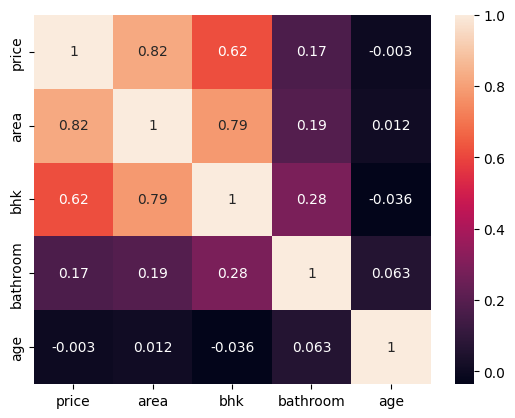

In [11]:
sns.heatmap(data.corr(), annot= True)

In [22]:
X = data[['area', 'bhk', 'bathroom', 'age']]
Y = data['price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, test_size= 0.3)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)

In [26]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()
lr.fit(X_trains,Y_train)

LinearRegression()

In [34]:
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
area,96.268230
bhk,-10.468874
bathroom,3.138054
age,-2.497086


In [41]:
X_tests = scaler.transform(X_test)
ac = lr.score(X_tests,Y_test)
print (ac)

0.6802361752756408


<ipython-input-39-0cea3b633210>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-pred),bins=50)


<Axes: xlabel='price', ylabel='Density'>

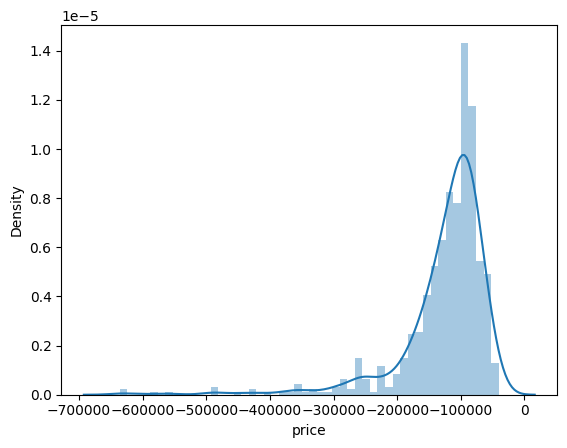

In [39]:
sns.distplot((Y_test-pred),bins=50)

In [47]:
print ("ACCURACY OF THE HOUSE PRICE PREDICTION IS :",ac*100, "%")

ACCURACY OF THE HOUSE PRICE PREDICTION IS : 68.02361752756408 %
